In [2]:
#load when is first time running
%reload_ext kedro.ipython

[08/08/24 16:58:06] INFO     Using '/media/frank/Frank                                              __init__.py:246
                             ssd/Maestria/labo_2/competencia/labo_2/lib/python3.10/site-packages/ke                
                             dro/framework/project/rich_logging.yml' as logging configuration.                     

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:58

                    INFO     Registered line magic '%load_node'                                      __init__.py:60

                    INFO     Resolved project path as: /media/frank/Frank                           __init__.py:175
                             ssd/Maestria/labo_2/competencia/pet_project/pet-competition.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/08/24 16:58:09] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[08/08/24 16:58:10] INFO     Kedro project Pet_competition                                          __init__.py:141

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:142
                             'pipelines'                                                                           

[08/08/24 16:58:12] INFO     Registered line magic 'run_viz'                                        __init__.py:148

In [3]:
catalog


{'train': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/media/frank/Frank "
          "ssd/Maestria/labo_2/competencia/pet_project/pet-competition/data/01_raw/train/train.csv'), "
          "protocol='file', load_args={}, save_args={'index': False})",
 'breed_labels': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/media/frank/Frank "
                 "ssd/Maestria/labo_2/competencia/pet_project/pet-competition/data/01_raw/breed_labels.csv'), "
                 "protocol='file', load_args={}, save_args={'index': False})",
 'color_labels': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/media/frank/Frank "
                 "ssd/Maestria/labo_2/competencia/pet_project/pet-competition/data/01_raw/color_labels.csv'), "
                 "protocol='file', load_args={}, save_args={'index': False})",
 'state_labels': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('/media/frank/Frank "
                

# Librerias

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

# EDA

## Exploracion inicial

In [5]:
df = catalog.load("train")
df.head()

[08/08/24 16:58:14] INFO     Loading data from train (CSVDataset)...                            data_catalog.py:537

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

No se observan valores nulos ✅

In [7]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


Anomalias detectadas en:
* **Age**:  max: 255 months ~ 21.25 years...
* **Gender**:  tipo 3 = mixed 

---
## Clasificacion de variables

Identificadores:
* PetID
* RescuerID

Cantitativas:
* Age - Age of pet when listed, in months
* Quantity - Number of pets represented in profile
* Fee
* VideoAmt
* PhotoAmt

Categoricas:
* Type -  (1 = Dog, 2 = Cat)
* Name
* Breed1 
* Breed2
* Gender - (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1
* Color2
* Color3
* MaturitySize - (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLenght - (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - (1 = Yes, 2 = No, 3 = Not Sure)
* Health - (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* State
* Description

Target
* AdoptionSpeed

0 - Pet was adopted on the same day as it was listed.

1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).







## Variables cuantitativas

In [19]:
cuant_cols = ['Age','Quantity','Fee','VideoAmt','PhotoAmt']
target = 'AdoptionSpeed'

### Distribuciones

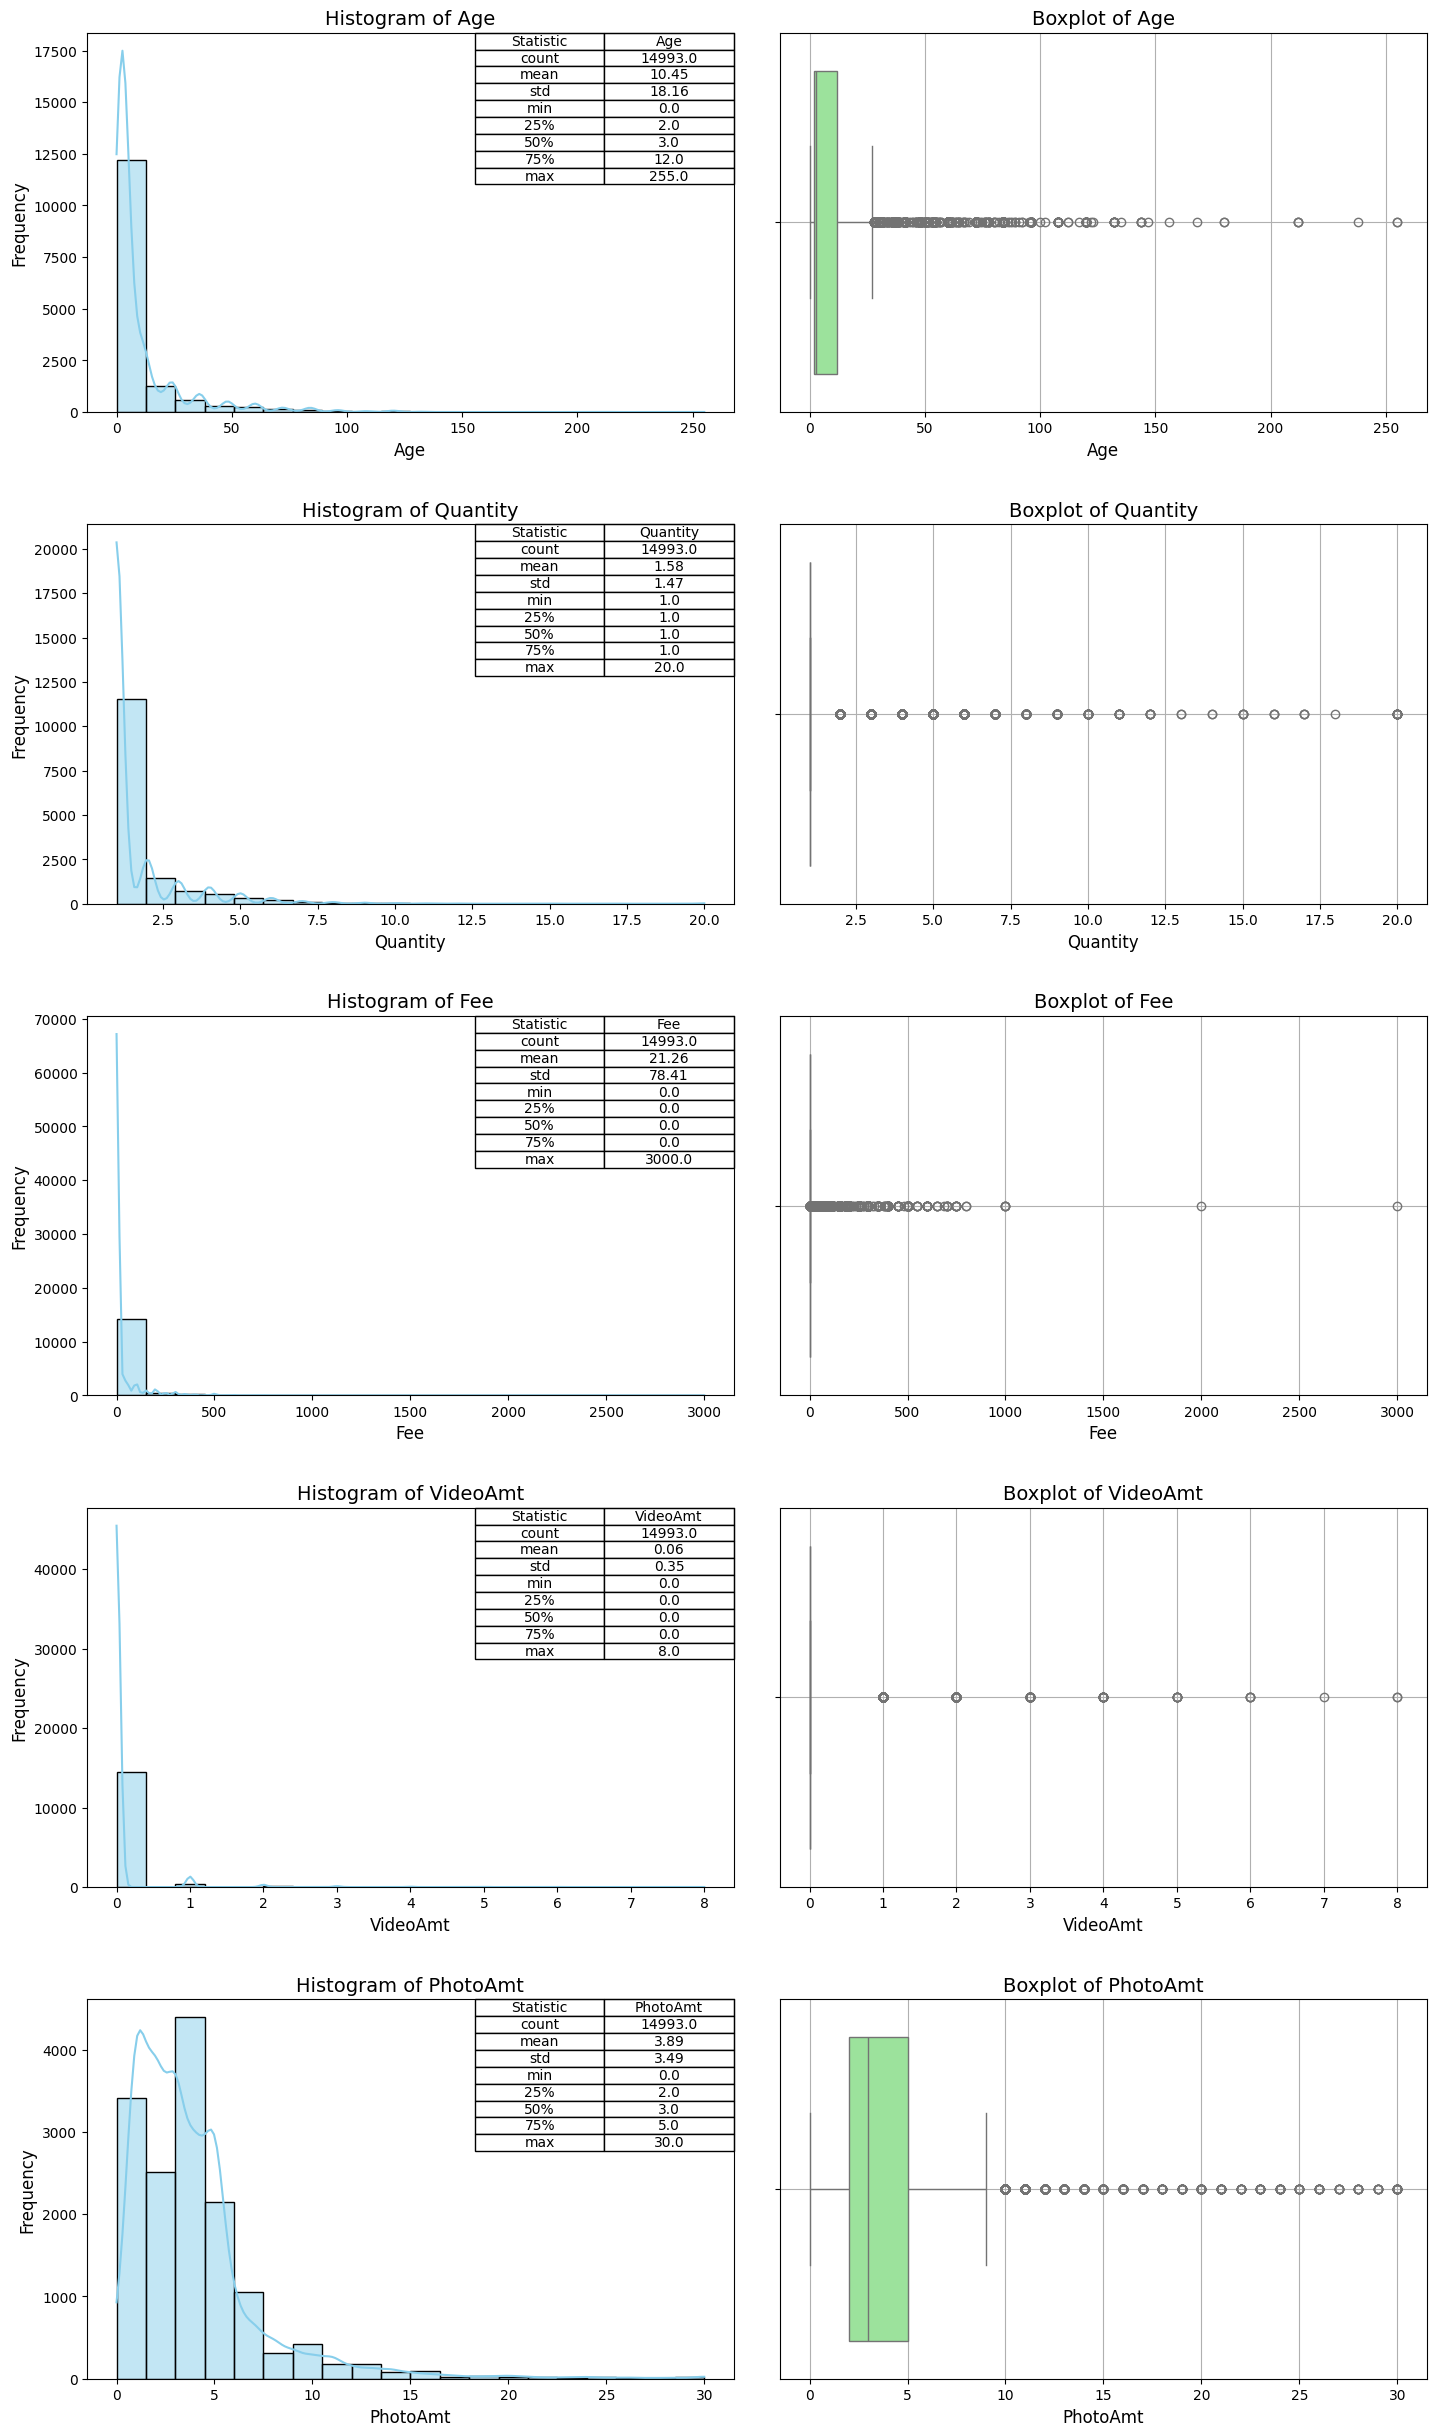

In [11]:
plot_histogram_boxplot_with_stats(df, cuant_cols)

### Distribuciones por nivel de 'AdoptionSpeed'

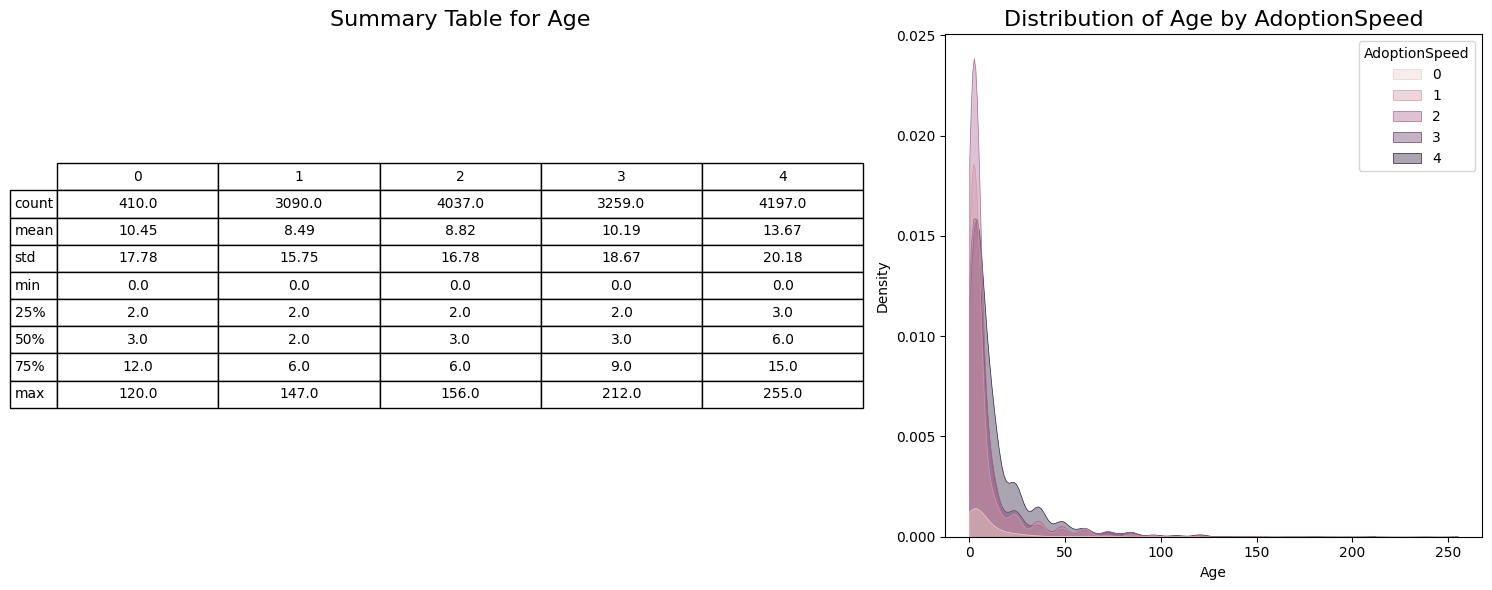

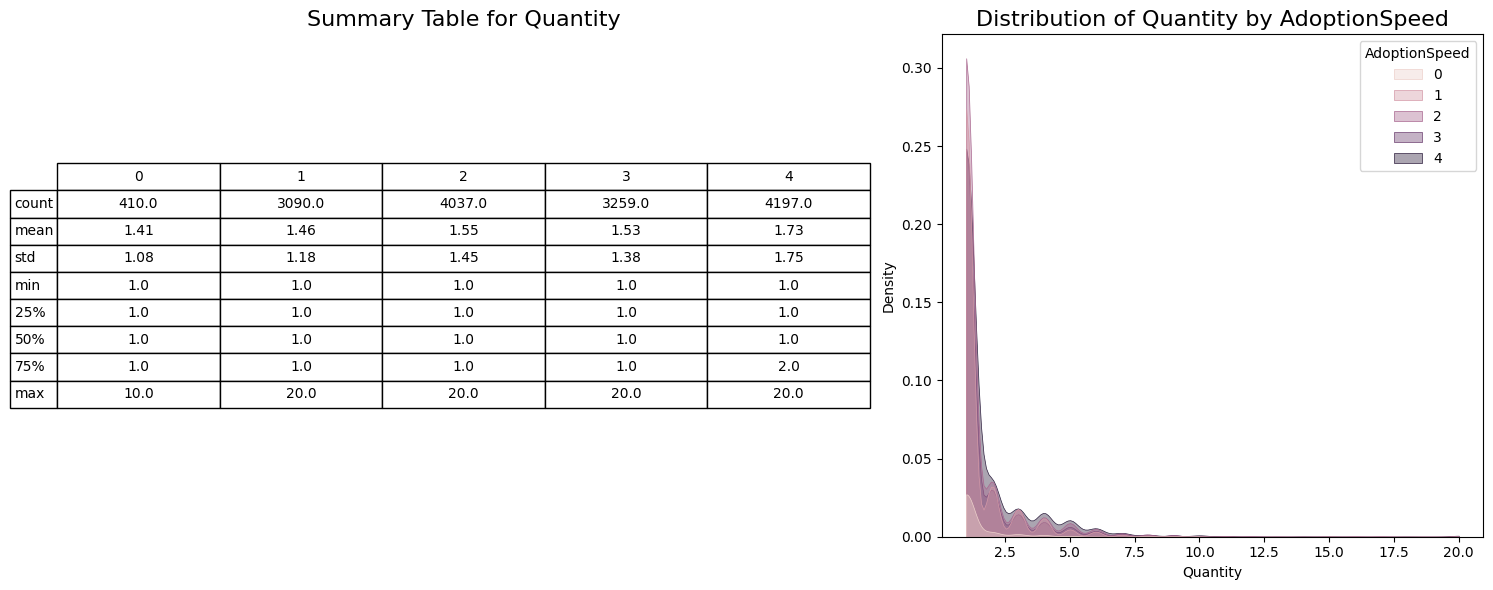

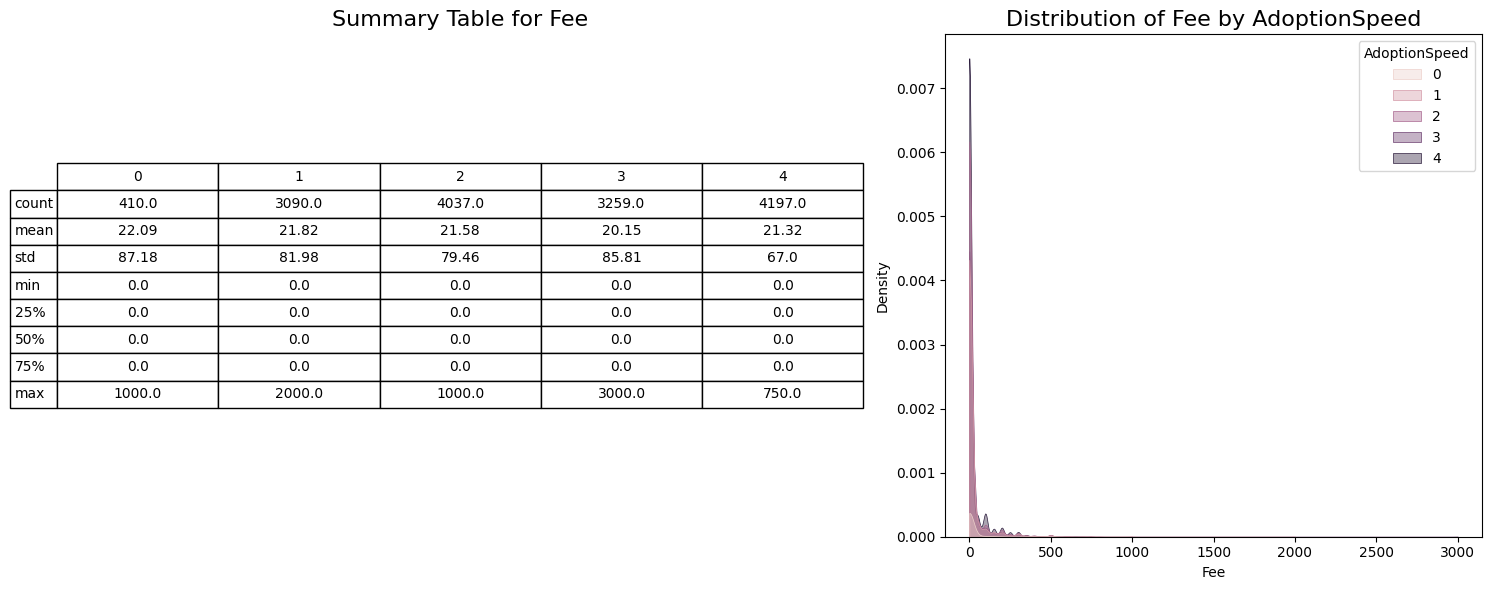

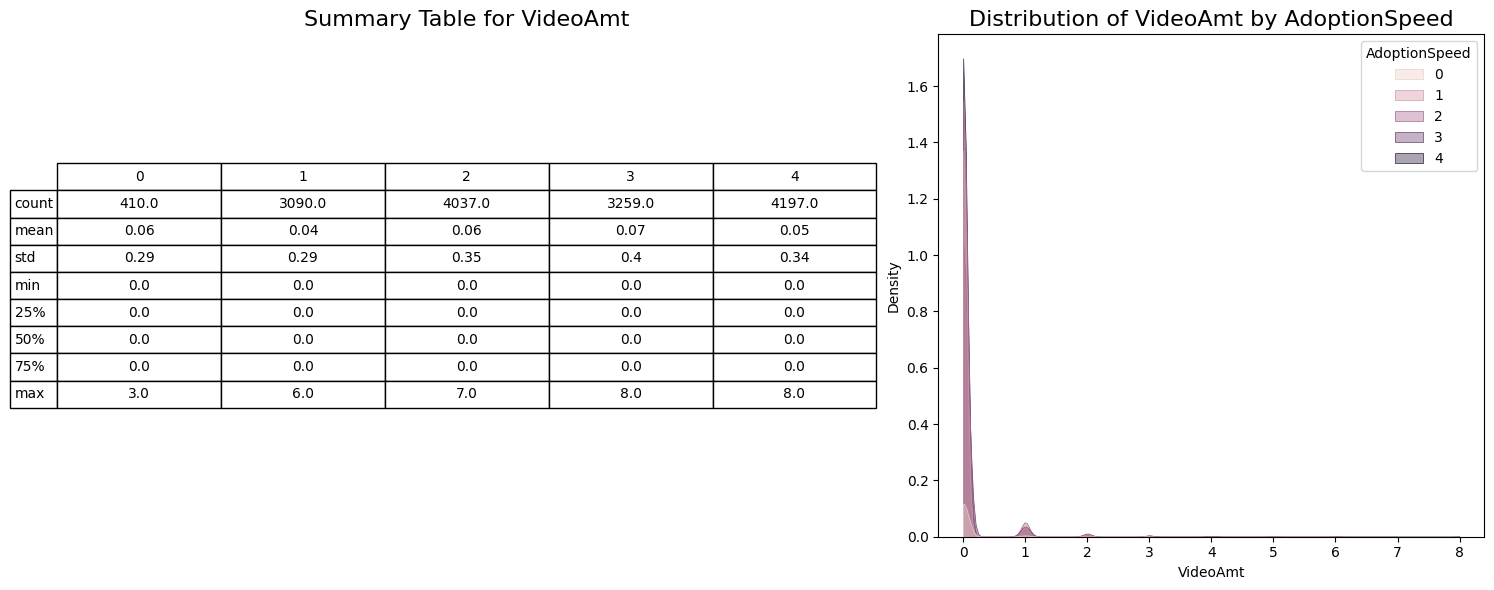

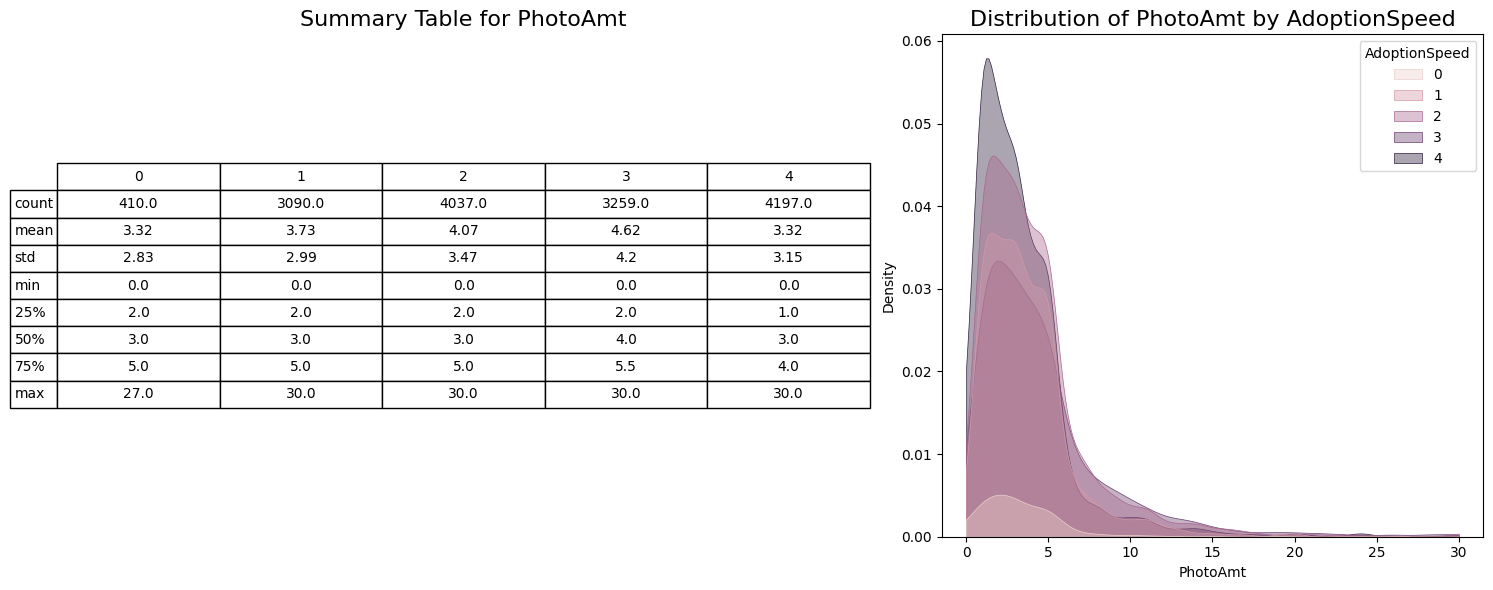

In [17]:

create_summary_table_with_kde(df, cuant_cols, target)

A priori 

--- 

Tras inspeccionar el dataset y el diccionario de datos provisto, se observa que varias columnas numericas son referencia a valores categoricos hallados en otras tablas.

## Incorporacion datasets de labels

In [ ]:
df_colors = catalog.load("color_labels")
df_breed = catalog.load("breed_labels")
df_state = catalog.load("state_labels")

                    INFO     Loading data from color_labels (CSVDataset)...                     data_catalog.py:537

                    INFO     Loading data from breed_labels (CSVDataset)...                     data_catalog.py:537

                    INFO     Loading data from state_labels (CSVDataset)...                     data_catalog.py:537

### Colors

In [ ]:
df_colors.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [ ]:
df_colors.shape

(7, 2)

### Breed

In [ ]:
df_breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [ ]:
df_breed.shape

(307, 3)

In [ ]:
df_breed.isna().sum()


BreedID      0
Type         0
BreedName    0
dtype: int64

### State

In [ ]:
df_state.head(20)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


## Unificacion de datasets

In [ ]:
merged_df = pd.merge(df, df_breed, how='left', left_on=['Breed1'], right_on=['BreedID'], suffixes=[" ","_name"])

merged_df

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,AdoptionSpeed,BreedID_x,Type_y,BreedName_x,BreedID_y,Type,BreedName_y,BreedID,Type_name,BreedName
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,299.0,2.0,Tabby,NaN,NaN,NaN,299.0,2.0,Tabby
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,265.0,2.0,Domestic Medium Hair,NaN,NaN,NaN,265.0,2.0,Domestic Medium Hair
2,1,Brisco,1,307,0,1,2,7,0,2,...,3,307.0,1.0,Mixed Breed,NaN,NaN,NaN,307.0,1.0,Mixed Breed
3,1,Miko,4,307,0,2,1,2,0,2,...,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,307.0,1.0,Mixed Breed
4,1,Hunter,1,307,0,1,1,0,0,2,...,2,307.0,1.0,Mixed Breed,NaN,NaN,NaN,307.0,1.0,Mixed Breed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,2,266.0,2.0,Domestic Short Hair,NaN,NaN,NaN,266.0,2.0,Domestic Short Hair
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,4,265.0,2.0,Domestic Medium Hair,264.0,2.0,Domestic Long Hair,265.0,2.0,Domestic Medium Hair
14990,2,Monkies,2,265,266,3,5,6,7,3,...,3,265.0,2.0,Domestic Medium Hair,266.0,2.0,Domestic Short Hair,265.0,2.0,Domestic Medium Hair
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,4,266.0,2.0,Domestic Short Hair,NaN,NaN,NaN,266.0,2.0,Domestic Short Hair


---

# **Aux Functions**

---

In [10]:
# Graficos descriptivos para variables cuantitativas.

def plot_histogram_boxplot_with_stats(df, variables, bins=20, hist_color='skyblue', box_color='lightgreen'):
    num_vars = len(variables)
    plt.figure(figsize=(15, 5 * num_vars))  # Adjust figure size based on number of variables

    for i, var in enumerate(variables):
        # Summary statistics with rounding to 2 decimals
        stats = df[var].describe().reset_index()
        stats.columns = ['Statistic', var]
        stats[var] = stats[var].round(2)  # Round to 2 decimal places

        # Histogram with table inside
        ax_hist = plt.subplot(num_vars, 2, 2 * i + 1)
        sns.histplot(df[var], bins=bins, kde=True, color=hist_color, ax=ax_hist)
        ax_hist.set_title(f'Histogram of {var}', fontsize=14)
        ax_hist.set_xlabel(var, fontsize=12)
        ax_hist.set_ylabel('Frequency', fontsize=12)
        ax_hist.grid(False)

        # Add the summary table inside the histogram plot
        table_data = stats.values
        ax_hist.table(cellText=table_data,
                      colLabels=stats.columns,
                      cellLoc='center', rowLoc='center',
                      colLoc='center', loc='upper right',
                      bbox=[0.6, 0.6, 0.4, 0.4])  # Adjust bbox for positioning

        # Boxplot
        ax_box = plt.subplot(num_vars, 2, 2 * i + 2)
        sns.boxplot(x=df[var], color=box_color, ax=ax_box)
        ax_box.set_title(f'Boxplot of {var}', fontsize=14)
        ax_box.set_xlabel(var, fontsize=12)
        ax_box.grid(True)

    plt.tight_layout(pad=3.0)  # Adjust spacing between plots
    plt.show()


In [18]:
# Tablas de resumen estadisticos por nivel de 'AdoptionSpeed' + histogramas:

def create_summary_table_with_kde(df, cuant_cols, target):
    for var in cuant_cols:
        # Group by the target variable and calculate summary statistics
        grouped_stats = df.groupby(target)[var].describe().T.round(2)
        
        # Set up the figure for the table and the KDE plot
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot the summary table
        table = axes[0].table(cellText=grouped_stats.values,
                              colLabels=grouped_stats.columns,
                              rowLabels=grouped_stats.index,
                              loc='center',
                              cellLoc='center')
        table.scale(1.5, 1.5)
        axes[0].axis('off')
        axes[0].set_title(f'Summary Table for {var}', fontsize=16)
        
        # Plot the KDE for the variable
        sns.kdeplot(data=df, x=var, hue=target,
                    hue_order=df[target].unique()[::-1],
                    fill=True, alpha=0.4, linewidth=0.5, cut=0., ax=axes[1])
        axes[1].set_title(f'Distribution of {var} by {target}', fontsize=16)
        axes[1].set_xlabel(var)
        axes[1].set_ylabel('Density')
        
        # Show the plot
        plt.tight_layout()
        plt.show()
